In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [29]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing



In [30]:
# Load the Bank Marketing dataset
url = r"D:\internship\prodigy\bank\bank+marketing (1)\bank-additional\bank-additional\bank-additional-full.csv"
df = pd.read_csv(url, sep=';')
print(df.head())



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [31]:
# Display the first few rows of the dataset

# Convert categorical variables to numerical using Label Encoding
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

# Define features (X) and target variable (y)


In [32]:
X = df.drop('y', axis=1)
y = df['y']



In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# Build the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [35]:
# Make predictions on the test set
predictions = classifier.predict(X_test)



In [36]:
df = df.dropna()

In [37]:
df = pd.get_dummies(df)

In [38]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.89


In [40]:
# Display classification report
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



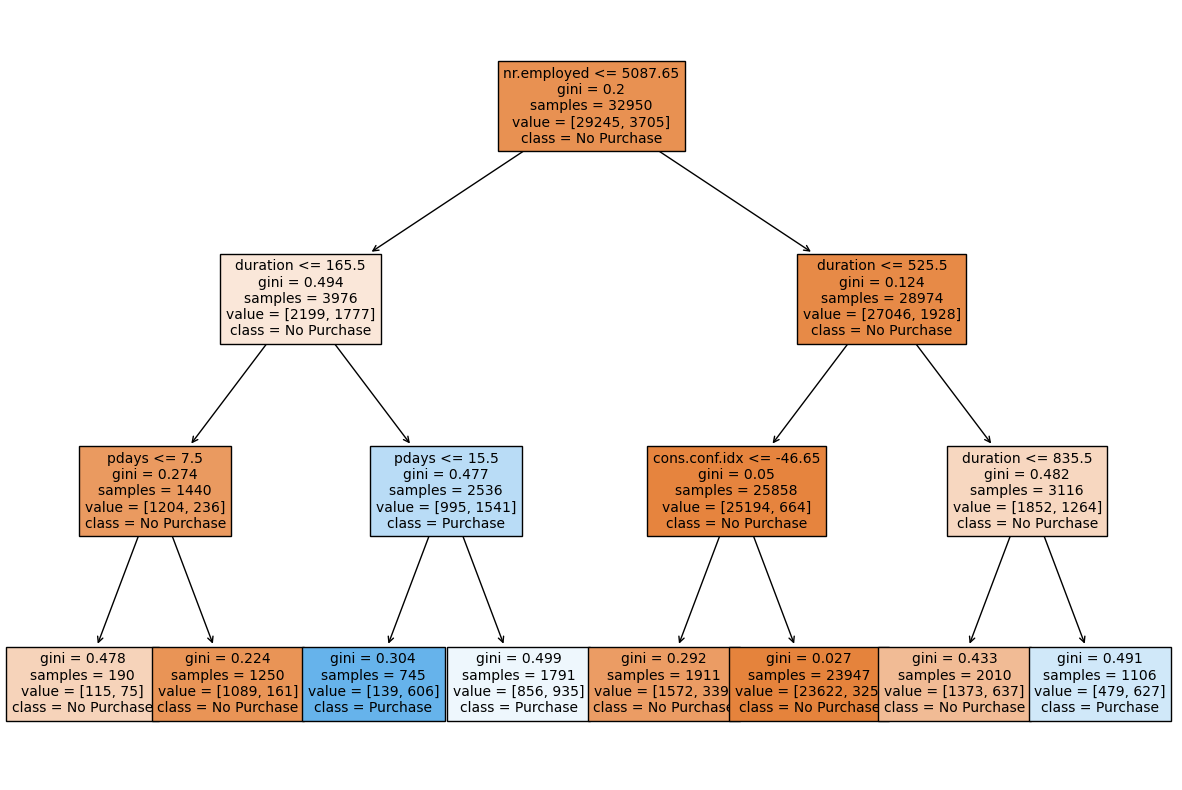

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(clf, feature_names=list(X.columns), class_names=['No Purchase', 'Purchase'], filled=True, fontsize=10)
plt.show()